<a href="https://colab.research.google.com/github/Fysl-abdek/Deep_Learning/blob/main/Face_classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from sklearn.model_selection import train_test_split

### load the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_st = os.chdir('/content/drive/My Drive/Data')

os.getcwd()

'/content/drive/My Drive/Data'

In [5]:
data_st = 'age_gender.csv.zip'

In [6]:
from zipfile import ZipFile
with ZipFile(data_st ,'r') as zip_file:
   zip_file.extractall()


In [7]:

data_st = pd.read_csv("age_gender.csv")

In [8]:
data_st.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


### Preproceassing

In [9]:
data_st.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [10]:
{column:list(data_st[column].unique()) for column in ["gender" ,"ethnicity","age"]}

{'gender': [0, 1],
 'ethnicity': [2, 3, 4, 0, 1],
 'age': [1,
  10,
  100,
  101,
  103,
  105,
  11,
  110,
  111,
  115,
  116,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  2,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  3,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  4,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  5,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  6,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  7,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  8,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  9,
  90,
  91,
  92,
  93,
  95,
  96,
  99]}

In [11]:
data_st["age"] = pd.qcut(data_st["age"],q =10, labels=[0,1,2,3,4,5,6,7,8,9])

In [12]:
data_st.age.head(7)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: age, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [174]:
{column:list(data_st[column].unique()) for column in ["gender" ,"ethnicity","age"]}

{'gender': [0, 1],
 'ethnicity': [2, 3, 4, 0, 1],
 'age': [0, 1, 9, 2, 3, 4, 5, 6, 7, 8]}

In [11]:
data_st

,age,ethnicity,gender,img_name,pixels
0,0,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,0,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,0,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,0,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,0,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,3,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,3,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,3,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,3,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [13]:
data_st = data_st.drop("img_name",axis=1)
data_st

,age,ethnicity,gender,pixels
0,0,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,0,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,0,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,0,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,0,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,9,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,9,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,9,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,9,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


In [14]:
print(len(data_st["pixels"][0].split(' ')))
print(np.sqrt(2304))

2304
48.0


In [15]:
target_colume = ["age","ethnicity","gender"]
Y = data_st[target_colume]
X = data_st.drop(target_colume,axis = 1)
Y

,age,ethnicity,gender
0,0,2,0
1,0,2,0
2,0,2,0
3,0,2,0
4,0,2,0
...,...,...,...
23700,9,0,1
23701,9,1,1
23702,9,2,1
23703,9,2,1


In [16]:
y_gender = np.array(Y['gender'])
y_age = np.array(Y['age'])
y_ethnicity = np.array(Y['ethnicity'])

In [17]:
X = pd.Series(X["pixels"])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x : np.array(list(map(lambda z:int(z) ,x))))
X = np.array(X)
X = np.stack(np.array(X) , axis = 0)

In [17]:
X.shape

(23705, 2304)

In [18]:
X = np.reshape(X,(-1,48,48))
X.shape

(23705, 48, 48)

### Data Visualization

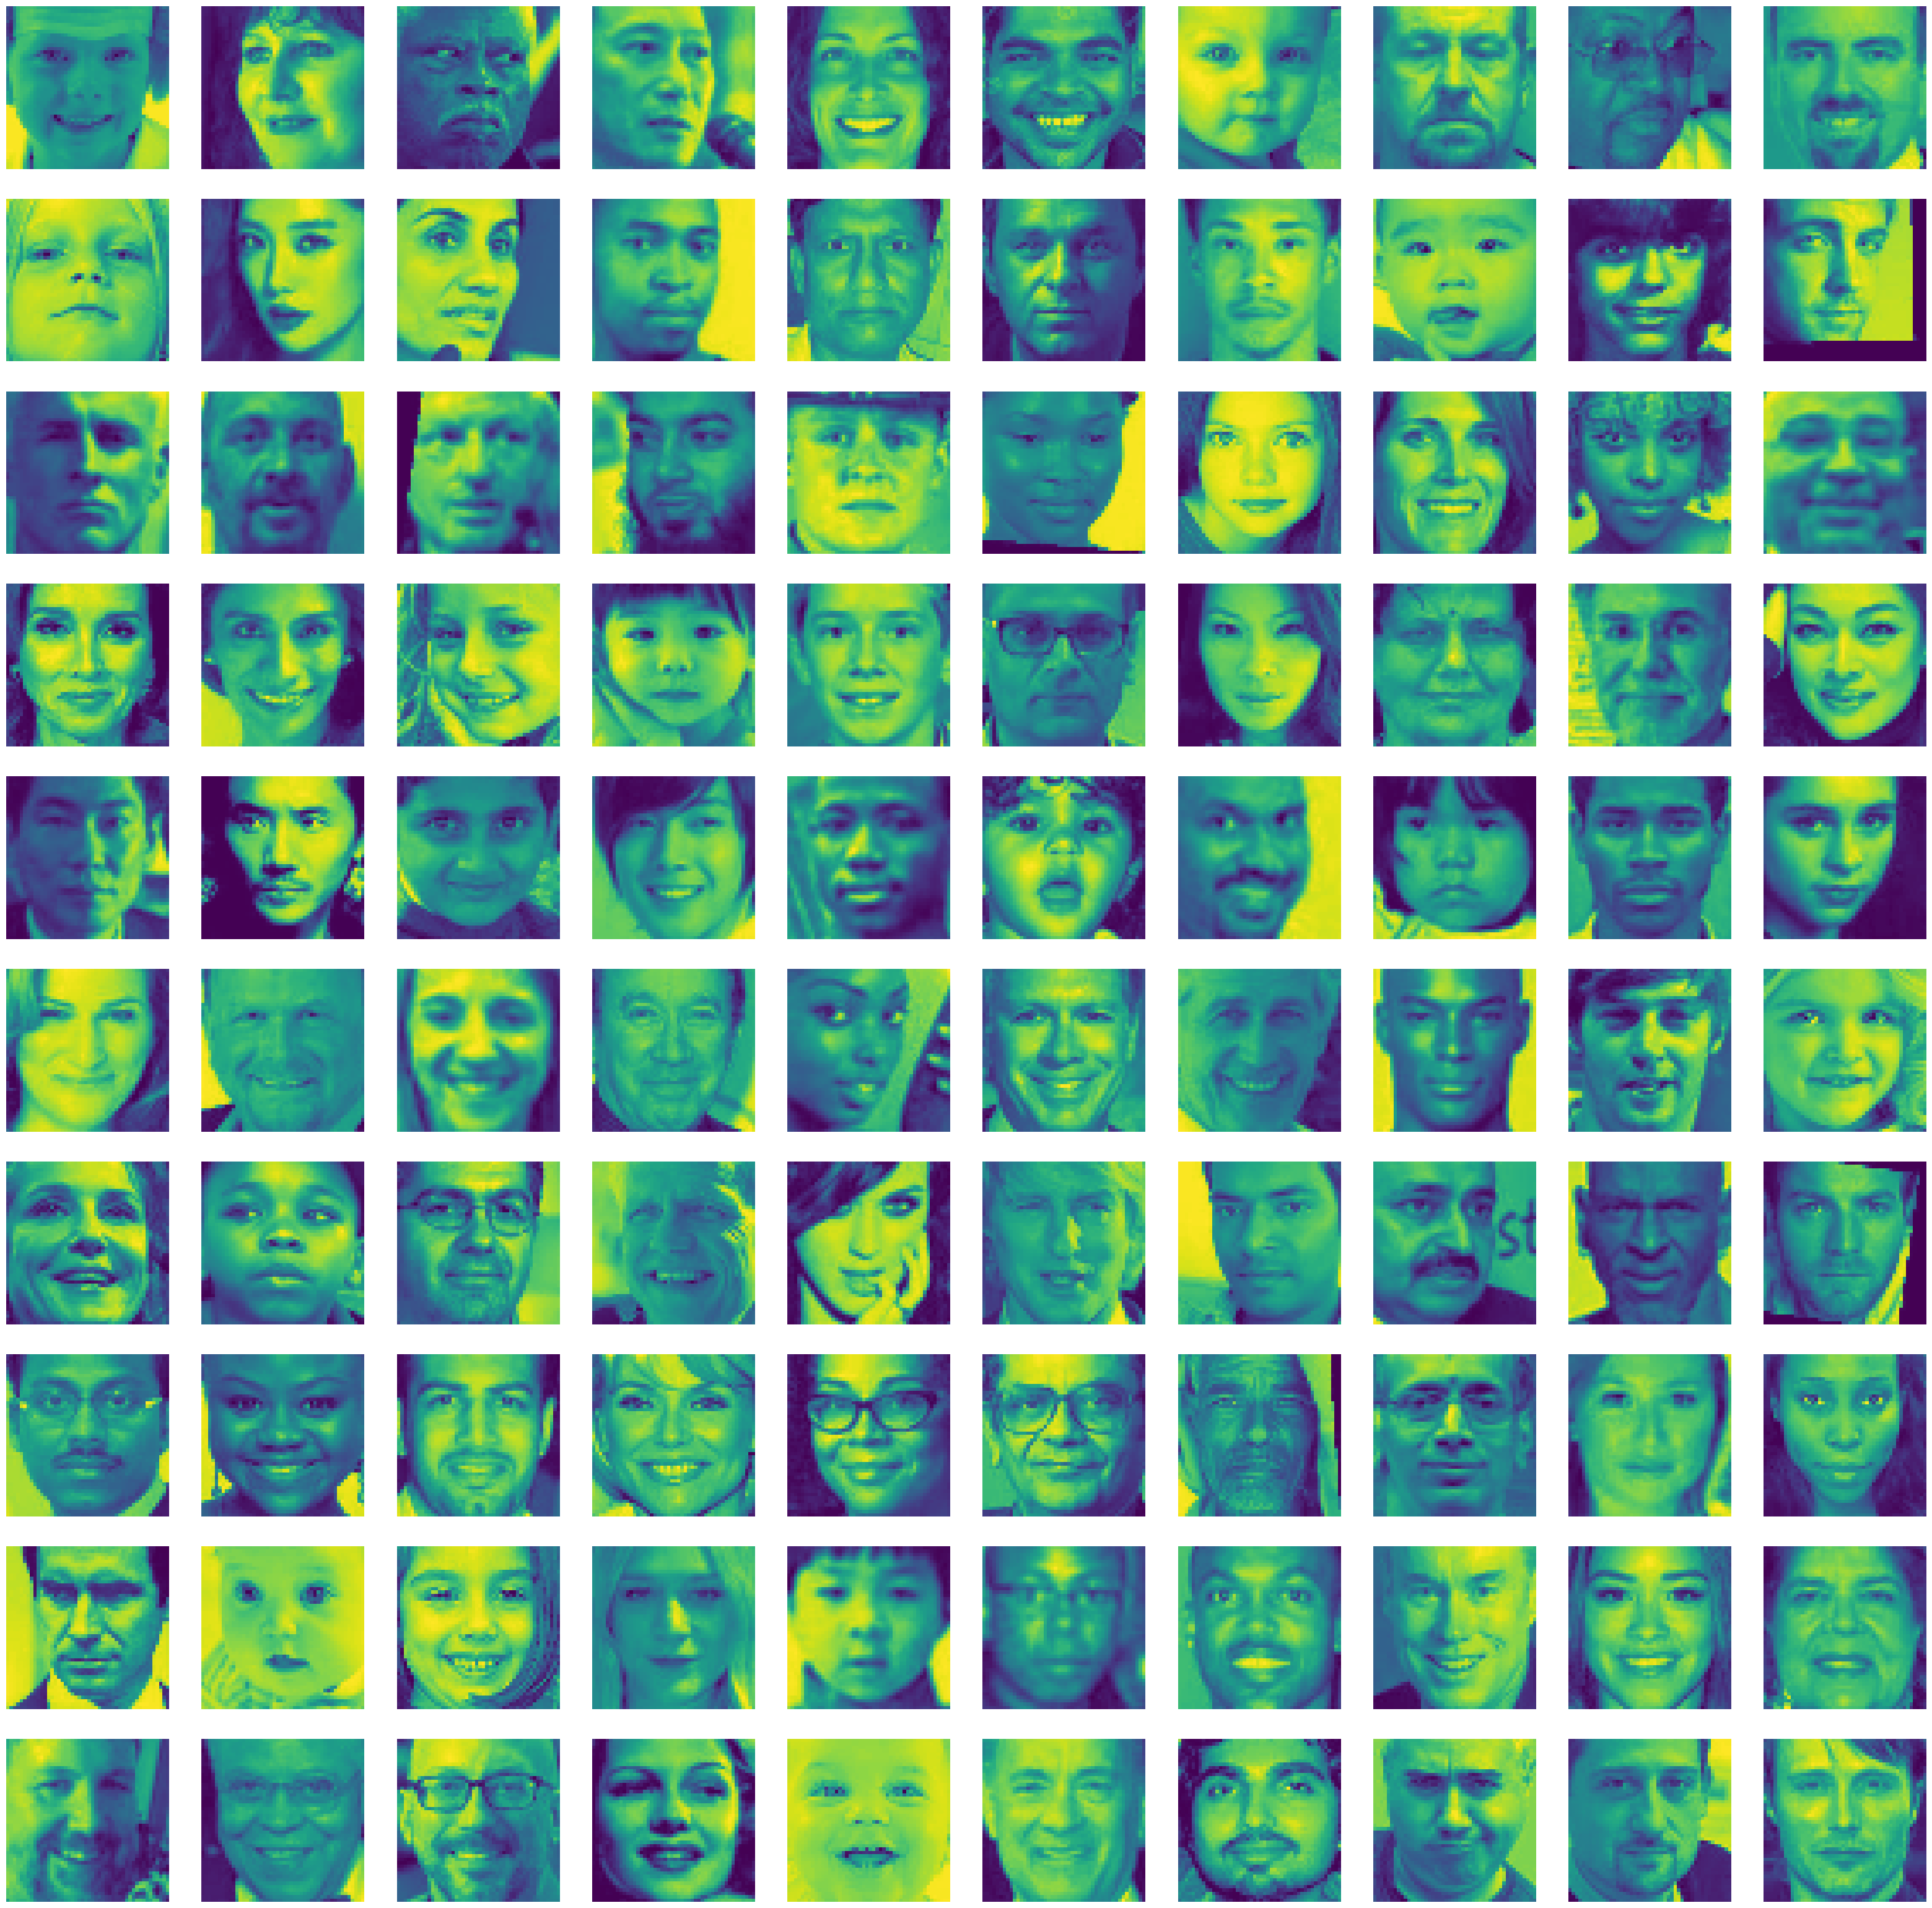

In [19]:
W_grad = 10
h_grad = 10

fig , axse = plt.subplots(W_grad,h_grad,figsize=(40,40))
axse = axse.ravel()
for i in range(W_grad*h_grad):
   index = np.random.randint(0,len(X))
   axse[i].imshow(X[index])
   axse[i].axis('off')
plt.subplots_adjust(hspace=0.1)

In [51]:
def build_model(finActiv ,loss, classes):
   '''
      return the model
      args:
      finActiv : output layer activaction (final activactin)
      classes : number of classes 
   '''
   # entry block
   input = tf.keras.Input(shape = (48,48,1))
   x = tf.keras.layers.Rescaling(1./255)(input)
   x = tf.keras.layers.Conv2D(32,3,padding = 'same')(x)
   x = tf.keras.layers.Activation(activation= "relu")(x)

   # max pooling layer
   x = tf.keras.layers.MaxPool2D((2,2))(x)
   
   # convolutional layer 
   x = tf.keras.layers.Conv2D(64, 3, padding = 'same')(x)
   x = tf.keras.layers.Activation(activation='relu')(x)

   # convolutional layer
   x = tf.keras.layers.Conv2D(128, 3, padding='same')(x)
   x = tf.keras.layers.Activation(activation='relu')(x)

   # max pooling layer
   x = tf.keras.layers.MaxPool2D((2, 2))(x)

   # convolutional layer
   x = tf.keras.layers.Conv2D(256, 3, padding='same')(x)
   x = tf.keras.layers.Activation(activation='relu')(x)

   # max pooling layer
   x = tf.keras.layers.MaxPool2D((2, 2))(x)

   # dropout layers
   x = tf.keras.layers.Dropout(0.4)(x)

   # Fully connected layer
   x = tf.keras.layers.Flatten()(x)
   x = tf.keras.layers.Dense(128, activation='relu')(x)

   # dropout layers
   x = tf.keras.layers.Dropout(0.5)(x)
   output = tf.keras.layers.Dense(classes, activation=finActiv)(x)

   model = tf.keras.models.Model(inputs = input , outputs = output)

   model.compile(
         optimizer='adam',
         loss=loss,
         metrics=['accuracy']
   )

   return model


In [36]:
# define some callback
Erl_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=10)
Chickpoint = tf.keras.callbacks.ModelCheckpoint('Model.h5',monitor='val_loss')

# Gender Model 

In [44]:
# compile the model
gender_model = build_model(finActiv="sigmoid",classes=1,loss='binary_crossentropy')

In [21]:
# let's take alook our model architectuer
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496 

In [22]:
# split the data to train, test data

X_gender_trian,x_gender_test,Y_gender_train,y_gender_test = train_test_split(X,y_gender,test_size=0.2,random_state=123)

Train our Model 

In [45]:
history = gender_model.fit(X_gender_trian,
                           Y_gender_train,
                           epochs = 5,
                           validation_split = 0.2,
                           validation_data=(x_gender_test,y_gender_test),
                           batch_size = 32,
                           verbose = 1,
                           )

Epoch 1/5
593/593 [==============================] - 10s 12ms/step - loss: 0.4920 - accuracy: 0.7487 - val_loss: 0.3396 - val_accuracy: 0.8496
Epoch 2/5
593/593 [==============================] - 6s 10ms/step - loss: 0.3293 - accuracy: 0.8510 - val_loss: 0.3431 - val_accuracy: 0.8454
Epoch 3/5
593/593 [==============================] - 6s 10ms/step - loss: 0.2871 - accuracy: 0.8733 - val_loss: 0.2676 - val_accuracy: 0.8819
Epoch 4/5
593/593 [==============================] - 6s 10ms/step - loss: 0.2579 - accuracy: 0.8874 - val_loss: 0.2546 - val_accuracy: 0.8897
Epoch 5/5
593/593 [==============================] - 6s 10ms/step - loss: 0.2402 - accuracy: 0.8963 - val_loss: 0.2495 - val_accuracy: 0.8897


In [62]:
# evaluate the model 

gender_model.evaluate(x_gender_test,y_gender_test)

149/149 [==============================] - 1s 4ms/step - loss: 12721502365484580864.0000 - accuracy: 0.4910


[1.272150236548458e+19, 0.4910356402397156]

### Learning curves

let's take a look at the learning curves of the training and validation accuracy and loss  

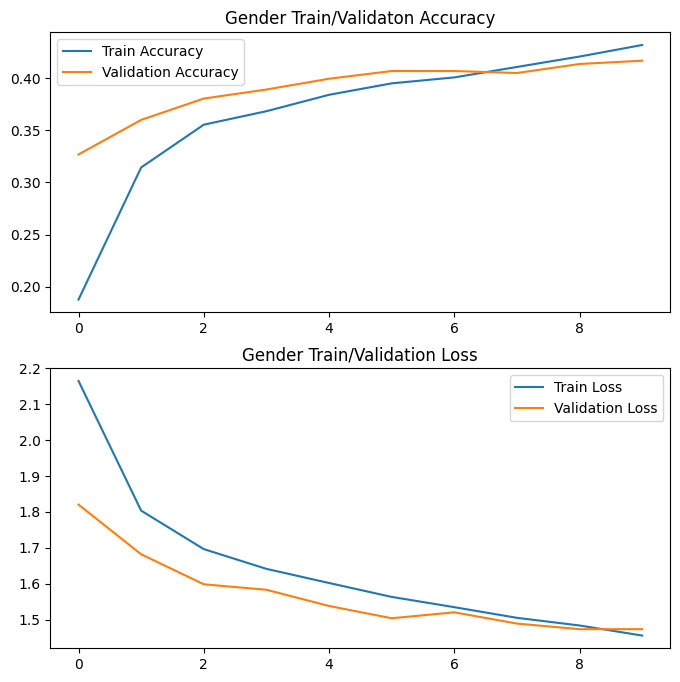

In [56]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

gender_acc = history.history["accuracy"]
gender_val_acc = history.history["val_accuracy"]

x = range(len(loss))

plt.figure(figsize = (8,8))
plt.subplot(211)
plt.plot(x, gender_acc, label='Train Accuracy')
plt.plot(x, gender_val_acc, label="Validation Accuracy")
plt.title("Gender Train/Validaton Accuracy")
plt.legend()

plt.subplot(212)
plt.plot(x, loss, label ='Train Loss')
plt.plot(x, val_loss,label = "Validation Loss")
plt.title("Gender Train/Validation Loss")
plt.legend()

plt.show()


# Age Model

In [52]:
# compile the model
age_model = build_model(finActiv='softmax',loss='sparse_categorical_crossentropy',classes=10)

In [27]:
age_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        1849

In [28]:
# split the data
X_age_train,x_age_test,Y_age_train, y_age_test = train_test_split(X,y_age,test_size = 0.2,random_state = 123)

In [53]:
# train the model
history = age_model.fit( X_age_train,
                           Y_age_train,
                           epochs=10,
                           validation_split=0.2,
                           validation_data=(x_age_test, y_age_test),
                           batch_size=32,
                           verbose=1,
                           )


Epoch 1/10
593/593 [==============================] - 8s 11ms/step - loss: 2.1646 - accuracy: 0.1877 - val_loss: 1.8202 - val_accuracy: 0.3267
Epoch 2/10
593/593 [==============================] - 6s 10ms/step - loss: 1.8035 - accuracy: 0.3143 - val_loss: 1.6820 - val_accuracy: 0.3598
Epoch 3/10
593/593 [==============================] - 6s 10ms/step - loss: 1.6963 - accuracy: 0.3553 - val_loss: 1.5984 - val_accuracy: 0.3803
Epoch 4/10
593/593 [==============================] - 6s 9ms/step - loss: 1.6414 - accuracy: 0.3682 - val_loss: 1.5831 - val_accuracy: 0.3889
Epoch 5/10
593/593 [==============================] - 6s 10ms/step - loss: 1.6020 - accuracy: 0.3839 - val_loss: 1.5380 - val_accuracy: 0.3993
Epoch 6/10
593/593 [==============================] - 6s 10ms/step - loss: 1.5632 - accuracy: 0.3949 - val_loss: 1.5038 - val_accuracy: 0.4067
Epoch 7/10
593/593 [==============================] - 5s 9ms/step - loss: 1.5347 - accuracy: 0.4005 - val_loss: 1.5203 - val_accuracy: 0.4067
E

In [64]:
# evaluate the model
age_model.evaluate(x_age_test,y_age_test)

149/149 [==============================] - 1s 4ms/step - loss: 1.4734 - accuracy: 0.4166


[1.4733760356903076, 0.4165787696838379]

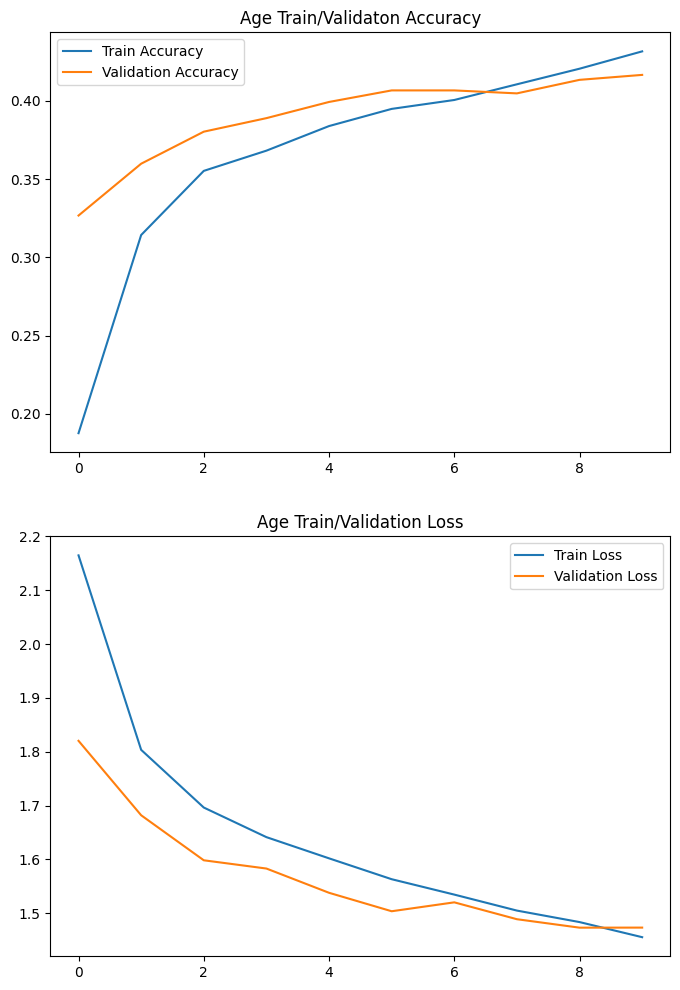

In [57]:
# plot learning curves 

loss = history.history["loss"]
val_loss = history.history["val_loss"]

age_acc = history.history["accuracy"]
age_val_acc = history.history["val_accuracy"]

x = range(len(loss))

plt.figure(figsize = (8,12))
plt.subplot(211)
plt.plot(x ,age_acc, label= 'Train Accuracy')
plt.plot(x, age_val_acc, label = "Validation Accuracy")
plt.title("Age Train/Validaton Accuracy")
plt.legend()

plt.subplot(212)
plt.plot(x, loss, label ='Train Loss')
plt.plot(x, val_loss,label = "Validation Loss")
plt.title("Age Train/Validation Loss")
plt.legend()

plt.show()

# Ethnicity Model

In [68]:
# split the data

X_train_ethnicity, x_ethnicity_test, Y_train_ethnicity, y_ethnicity_test = train_test_split(X,y_ethnicity,test_size=0.2,random_state=123)

In [69]:
# compile the model 
Ethnicity_model = build_model(finActiv='softmax',loss='categorical_crossentropy',classes=5)

In [70]:
# train the model
history = gender_model.fit(X_train_ethnicity,
                           Y_train_ethnicity,
                           epochs=5,
                           validation_split=0.2,
                           validation_data=(x_ethnicity_test,y_ethnicity_test),
                           batch_size=32,
                           verbose=1,
                           )


Epoch 1/5
593/593 [==============================] - 8s 13ms/step - loss: -7565697179528986624.0000 - accuracy: 0.1914 - val_loss: -8852279715654795264.0000 - val_accuracy: 0.1892
Epoch 2/5
593/593 [==============================] - 6s 10ms/step - loss: -9986499077228986368.0000 - accuracy: 0.1914 - val_loss: -11589059264945061888.0000 - val_accuracy: 0.1892
Epoch 3/5
593/593 [==============================] - 6s 10ms/step - loss: -12943118829667483648.0000 - accuracy: 0.1914 - val_loss: -14931065539500441600.0000 - val_accuracy: 0.1892
Epoch 4/5
593/593 [==============================] - 6s 10ms/step - loss: -16540154627262251008.0000 - accuracy: 0.1914 - val_loss: -18959963116206555136.0000 - val_accuracy: 0.1892
Epoch 5/5
593/593 [==============================] - 6s 10ms/step - loss: -20942699240435482624.0000 - accuracy: 0.1914 - val_loss: -23869293529342672896.0000 - val_accuracy: 0.1892


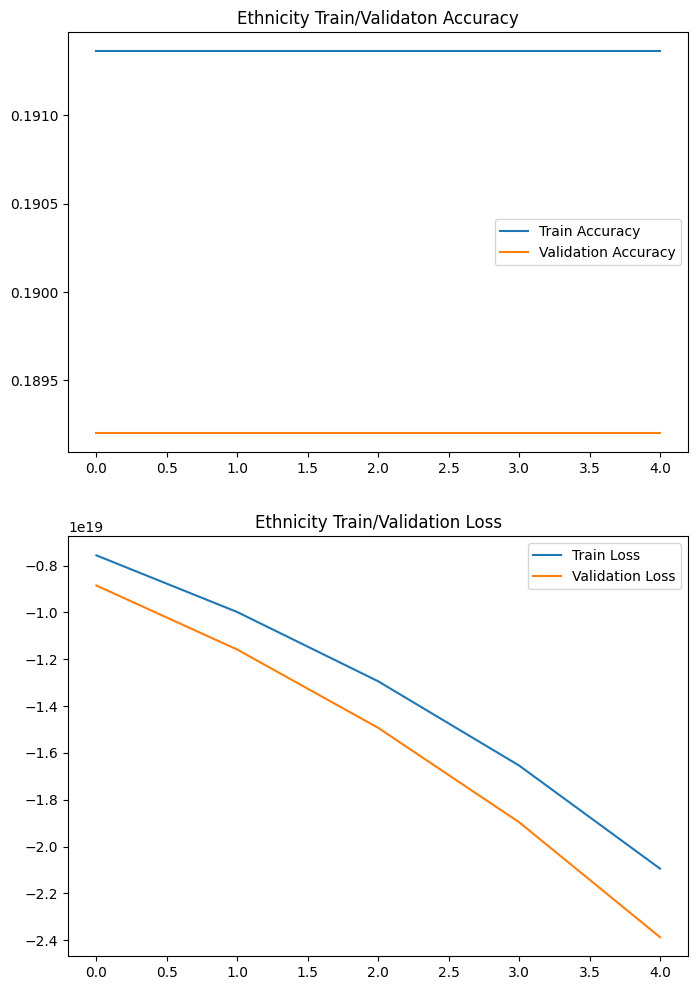

In [76]:
# plot learning curves

loss = history.history["loss"]
val_loss = history.history["val_loss"]

ethnicity_acc = history.history["accuracy"]
ethnicity_val_acc = history.history["val_accuracy"]

x = range(len(loss))

plt.figure(figsize=(8, 12))
plt.subplot(211)
plt.plot(x, ethnicity_acc, label='Train Accuracy')
plt.plot(x, ethnicity_val_acc, label="Validation Accuracy")
plt.title("Ethnicity Train/Validaton Accuracy")
plt.legend()

plt.subplot(212)
plt.plot(x, loss, label='Train Loss')
plt.plot(x, val_loss, label="Validation Loss")
plt.title("Ethnicity Train/Validation Loss")
plt.legend()

plt.show()
